<a href="https://colab.research.google.com/github/DeekshantKumar/CS725---project/blob/main/CS_725_GAN_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lidar Cloud Point Extraction

In [1]:
!pip install geemap
import geemap
!git clone https://github.com/geopandas/geopandas.git
!pip install geopandas
!pip install laspy[lazrs,laszip] # to read lidar data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'geopandas' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os

import numpy as np
import pandas as pd
# import geemap.colormaps as cm
import geopandas as gpd
import folium



In [3]:
# import ee

# !pip install tornado== 4.5.3
# import geemap.eefolium as geemap


### Read the LiDAR data

In [4]:
os.getcwd()

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/IIT B CS 725 project/')

Mounted at /content/drive


In [6]:
filename = 'C_37EZ1_7415_sample.las'
os.getcwd()

'/content/drive/MyDrive/IIT B CS 725 project'

In [7]:
import geemap
las = geemap.read_lidar(filename)
print(las)
print(las.header)

<LasData(1.2, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 1826741 points, 3 vlrs)>
<LasHeader(1.2, <PointFormat(1, 0 bytes of extra dims)>)>


In [8]:
las.header.point_count

1826741

In [9]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time']

In [10]:
# las.Y

array([439662362, 439662657, 439662496, ..., 439925385, 439925007,
       439925062], dtype=int32)

In [11]:
# geemap.view_lidar(filename, cmap='terrain', backend='panel', background='white')

The view_lidar() function is not supported in Colab.


In [12]:
# df = pd.DataFrame(np.hstack((las.X[:,None], las.Y[:,None], las.Z[:, None], las.return_number[:,None], las.classification[:,None], las.intensity[:,None])),
#                   columns = ['long', 'lat', 'elev', 'rt_num', 'class', 'intensity'])

In [14]:
# df['long'] = (df['long']/1000)
# df['lat'] = (df['lat']/1000)
# df.head()
# df=df[0:100000]

,long,lat,elev,rt_num,class,intensity
0,83150.336,439662.362,313,1,1,141
1,83150.412,439662.657,-39,1,1,126
2,83150.429,439662.496,-883,2,1,13
3,83150.513,439662.685,-1709,1,2,248
4,83150.298,439660.188,-1690,1,2,447


In [15]:
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat'], crs ="EPSG:28992"))

In [16]:
# gdf['geometry']

0          POINT (83150.336 439662.362)
1          POINT (83150.412 439662.657)
2          POINT (83150.429 439662.496)
3          POINT (83150.513 439662.685)
4          POINT (83150.298 439660.188)
                       ...             
1826736    POINT (83451.231 439926.112)
1826737    POINT (83451.294 439925.742)
1826738    POINT (83451.354 439925.385)
1826739    POINT (83451.418 439925.007)
1826740    POINT (83451.099 439925.062)
Name: geometry, Length: 1826741, dtype: geometry

In [17]:
# gdf=gdf[0:100000]
# gdf = gdf.to_crs("EPSG:4326")
# print(gdf.crs)
# gdf.head()

EPSG:4326


,long,lat,elev,rt_num,class,intensity,geometry
0,83150.336,439662.362,313,1,1,141,POINT (4.34228 51.94077)
1,83150.412,439662.657,-39,1,1,126,POINT (4.34229 51.94077)
2,83150.429,439662.496,-883,2,1,13,POINT (4.34229 51.94077)
3,83150.513,439662.685,-1709,1,2,248,POINT (4.34229 51.94077)
4,83150.298,439660.188,-1690,1,2,447,POINT (4.34228 51.94075)


In [18]:
# gdftemp=gdf[0:100000]
# full_csv=gdftemp.to_csv('file6.csv')

In [19]:
# h22=gdf[gdf.columns[0:6]]

In [20]:
# h22

,long,lat,elev,rt_num,class,intensity
0,83150.336,439662.362,313,1,1,141
1,83150.412,439662.657,-39,1,1,126
2,83150.429,439662.496,-883,2,1,13
3,83150.513,439662.685,-1709,1,2,248
4,83150.298,439660.188,-1690,1,2,447
...,...,...,...,...,...,...
99995,83219.193,439685.952,-2272,1,2,202
99996,83219.262,439686.306,-2286,1,2,129
99997,83219.327,439686.645,-2294,1,2,170
99998,83219.391,439686.972,-2303,1,2,166


In [21]:
# h22=h22.drop(['class'], axis=1)

In [22]:
# h22

,long,lat,elev,rt_num,intensity
0,83150.336,439662.362,313,1,141
1,83150.412,439662.657,-39,1,126
2,83150.429,439662.496,-883,2,13
3,83150.513,439662.685,-1709,1,248
4,83150.298,439660.188,-1690,1,447
...,...,...,...,...,...
99995,83219.193,439685.952,-2272,1,202
99996,83219.262,439686.306,-2286,1,129
99997,83219.327,439686.645,-2294,1,170
99998,83219.391,439686.972,-2303,1,166


In [23]:
# gdf_copy = gdf.copy()
# gdf3= gdf_copy[gdf_copy['class']==6]

In [24]:
# gdf3

,long,lat,elev,rt_num,class,intensity,geometry
27,83150.319,439657.499,1166,1,6,59,POINT (4.34229 51.94073)
49,83150.389,439656.063,1171,1,6,157,POINT (4.34229 51.94071)
50,83150.454,439656.398,1172,1,6,102,POINT (4.34229 51.94072)
51,83150.521,439656.742,1156,1,6,56,POINT (4.34229 51.94072)
52,83150.584,439657.090,1221,1,6,125,POINT (4.34229 51.94072)
...,...,...,...,...,...,...,...
99972,83217.638,439679.979,4850,1,6,200,POINT (4.34326 51.94094)
99973,83217.705,439680.295,4728,1,6,177,POINT (4.34326 51.94094)
99976,83217.997,439680.827,1384,1,6,251,POINT (4.34326 51.94094)
99977,83218.059,439681.146,1387,1,6,251,POINT (4.34327 51.94095)


In [25]:
# gdf_copy.head()

,long,lat,elev,rt_num,class,intensity,geometry
0,83150.336,439662.362,313,1,1,141,POINT (4.34228 51.94077)
1,83150.412,439662.657,-39,1,1,126,POINT (4.34229 51.94077)
2,83150.429,439662.496,-883,2,1,13,POINT (4.34229 51.94077)
3,83150.513,439662.685,-1709,1,2,248,POINT (4.34229 51.94077)
4,83150.298,439660.188,-1690,1,2,447,POINT (4.34228 51.94075)


In [26]:
# import pandas as pd
# temp=pd.read_csv('file8.csv')

In [27]:
# temp

,Unnamed: 0,long,lat,elev,rt_num,intensity,lat.1,lon,class
0,0,83150.336,439662.362,313,1,141,4.342285,51.940770,1
1,1,83150.412,439662.657,-39,1,126,4.342286,51.940772,1
2,2,83150.429,439662.496,-883,2,13,4.342286,51.940771,1
3,3,83150.513,439662.685,-1709,1,248,4.342287,51.940773,2
4,4,83150.298,439660.188,-1690,1,447,4.342285,51.940750,2
...,...,...,...,...,...,...,...,...,...
1048570,1048570,83268.918,439882.447,-3048,2,205,4.343963,51.942763,2
1048571,1048571,83268.988,439882.821,-3007,1,319,4.343964,51.942766,2
1048572,1048572,83267.710,439879.572,8532,1,17,4.343946,51.942737,1
1048573,1048573,83269.053,439883.178,-2945,2,230,4.343965,51.942769,2


In [28]:
# temp2= temp.drop("class", axis = 1)

In [29]:
# temp2=temp2[temp2.columns[3:8]]

In [30]:
# temp2

,elev,rt_num,intensity,lat.1,lon
0,313,1,141,4.342285,51.940770
1,-39,1,126,4.342286,51.940772
2,-883,2,13,4.342286,51.940771
3,-1709,1,248,4.342287,51.940773
4,-1690,1,447,4.342285,51.940750
...,...,...,...,...,...
1048570,-3048,2,205,4.343963,51.942763
1048571,-3007,1,319,4.343964,51.942766
1048572,8532,1,17,4.343946,51.942737
1048573,-2945,2,230,4.343965,51.942769


In [32]:
# label = temp['class']

In [34]:
# h=gdf[0:100000]
# h1=h.loc[h['class'] == 6]
# h1

,long,lat,elev,rt_num,class,intensity,geometry
27,83150.319,439657.499,1166,1,6,59,POINT (4.34229 51.94073)
49,83150.389,439656.063,1171,1,6,157,POINT (4.34229 51.94071)
50,83150.454,439656.398,1172,1,6,102,POINT (4.34229 51.94072)
51,83150.521,439656.742,1156,1,6,56,POINT (4.34229 51.94072)
52,83150.584,439657.090,1221,1,6,125,POINT (4.34229 51.94072)
...,...,...,...,...,...,...,...
99972,83217.638,439679.979,4850,1,6,200,POINT (4.34326 51.94094)
99973,83217.705,439680.295,4728,1,6,177,POINT (4.34326 51.94094)
99976,83217.997,439680.827,1384,1,6,251,POINT (4.34326 51.94094)
99977,83218.059,439681.146,1387,1,6,251,POINT (4.34327 51.94095)


In [35]:
# h12=h1[h1.columns[0:5]]

In [36]:
# h12

,long,lat,elev,rt_num,class
27,83150.319,439657.499,1166,1,6
49,83150.389,439656.063,1171,1,6
50,83150.454,439656.398,1172,1,6
51,83150.521,439656.742,1156,1,6
52,83150.584,439657.090,1221,1,6
...,...,...,...,...,...
99972,83217.638,439679.979,4850,1,6
99973,83217.705,439680.295,4728,1,6
99976,83217.997,439680.827,1384,1,6
99977,83218.059,439681.146,1387,1,6


## GAN experiment

In [37]:
# h1

,long,lat,elev,rt_num,class,intensity,geometry
27,83150.319,439657.499,1166,1,6,59,POINT (4.34229 51.94073)
49,83150.389,439656.063,1171,1,6,157,POINT (4.34229 51.94071)
50,83150.454,439656.398,1172,1,6,102,POINT (4.34229 51.94072)
51,83150.521,439656.742,1156,1,6,56,POINT (4.34229 51.94072)
52,83150.584,439657.090,1221,1,6,125,POINT (4.34229 51.94072)
...,...,...,...,...,...,...,...
99972,83217.638,439679.979,4850,1,6,200,POINT (4.34326 51.94094)
99973,83217.705,439680.295,4728,1,6,177,POINT (4.34326 51.94094)
99976,83217.997,439680.827,1384,1,6,251,POINT (4.34326 51.94094)
99977,83218.059,439681.146,1387,1,6,251,POINT (4.34327 51.94095)


In [38]:
# h1.to_csv('file1.csv')

In [39]:
# h1

,long,lat,elev,rt_num,class,intensity,geometry
27,83150.319,439657.499,1166,1,6,59,POINT (4.34229 51.94073)
49,83150.389,439656.063,1171,1,6,157,POINT (4.34229 51.94071)
50,83150.454,439656.398,1172,1,6,102,POINT (4.34229 51.94072)
51,83150.521,439656.742,1156,1,6,56,POINT (4.34229 51.94072)
52,83150.584,439657.090,1221,1,6,125,POINT (4.34229 51.94072)
...,...,...,...,...,...,...,...
99972,83217.638,439679.979,4850,1,6,200,POINT (4.34326 51.94094)
99973,83217.705,439680.295,4728,1,6,177,POINT (4.34326 51.94094)
99976,83217.997,439680.827,1384,1,6,251,POINT (4.34326 51.94094)
99977,83218.059,439681.146,1387,1,6,251,POINT (4.34327 51.94095)


In [113]:
import pandas as pd
pd_1=pd.read_csv('file8.csv')

In [114]:
pd1=pd_1

In [115]:
pd1

,Unnamed: 0,long,lat,elev,rt_num,intensity,lat.1,lon,class
0,0,83150.336,439662.362,313,1,141,4.342285,51.940770,1
1,1,83150.412,439662.657,-39,1,126,4.342286,51.940772,1
2,2,83150.429,439662.496,-883,2,13,4.342286,51.940771,1
3,3,83150.513,439662.685,-1709,1,248,4.342287,51.940773,2
4,4,83150.298,439660.188,-1690,1,447,4.342285,51.940750,2
...,...,...,...,...,...,...,...,...,...
1048570,1048570,83268.918,439882.447,-3048,2,205,4.343963,51.942763,2
1048571,1048571,83268.988,439882.821,-3007,1,319,4.343964,51.942766,2
1048572,1048572,83267.710,439879.572,8532,1,17,4.343946,51.942737,1
1048573,1048573,83269.053,439883.178,-2945,2,230,4.343965,51.942769,2


In [116]:
pd1=pd1[pd1.columns[6:]]

In [117]:
pd1

,lat.1,lon,class
0,4.342285,51.940770,1
1,4.342286,51.940772,1
2,4.342286,51.940771,1
3,4.342287,51.940773,2
4,4.342285,51.940750,2
...,...,...,...
1048570,4.343963,51.942763,2
1048571,4.343964,51.942766,2
1048572,4.343946,51.942737,1
1048573,4.343965,51.942769,2


In [118]:
# pd1= pd1.drop("class", axis = 1)

In [119]:
pd1=pd1[0:30000]

In [120]:
import torch
input_data=pd1.to_numpy()

input_data = input_data.flatten()
input_data = torch.from_numpy(input_data)
train_ds= []
train_ds.append(input_data)

In [121]:
len(train_ds[0])

90000

In [122]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=3, pin_memory=True)

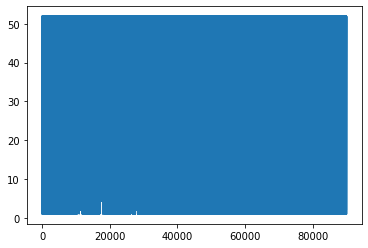

In [123]:
import matplotlib.pyplot as plt

plt.plot(train_ds[0])

In [124]:
import torch
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [125]:
device = get_default_device()
device

device(type='cpu')

In [126]:
train_dl = DeviceDataLoader(train_dl, device)

In [127]:
from tqdm.notebook import tqdm
import torch.nn.functional as F
from scipy.io.wavfile import write as wavwrite
import matplotlib.pyplot as plt

In [128]:
import torch.nn as nn

In [129]:
discriminator = nn.Sequential(

    nn.Linear(90000, 4096),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Linear(4096, 1024),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Linear(1024, 512),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Linear(512, 1),
    
    nn.Flatten(),
    nn.Sigmoid())

In [130]:
discriminator = to_device(discriminator, device)

In [131]:
import matplotlib.pyplot as plt

pd1.shape

(30000, 3)

In [132]:
for real_images in tqdm(train_dl):
    print (real_images.float())
    discriminator(real_images.float())

  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 4.3423, 51.9408,  1.0000,  ...,  4.3425, 51.9412,  1.0000]])


In [133]:
latent_size = 256
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose1d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm1d(512),
    nn.ReLU(True),
    # nn.summary()
    # out: 512 x 4 x 4

    nn.ConvTranspose1d(512,256, kernel_size=3, stride=1, padding=1, bias=False),
    nn.BatchNorm1d(256),
    nn.ReLU(True),
    # out: 256 x 4 x 4

    nn.ConvTranspose1d(256, 128, kernel_size=3, stride=1, padding=2, bias=False),
    nn.BatchNorm1d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose1d(128, 64, kernel_size=3, stride=1, padding=1, bias=False),
    nn.BatchNorm1d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose1d(64, 90000, kernel_size=3, stride=2, padding=2, bias=False),
    nn.Flatten(),
    nn.Tanh()
    # out: 3 x 64 x 64
)

In [134]:
xb = torch.randint(1,53, (64, latent_size,1))
xb=xb.float() # random latent tensors
print (xb.shape)
fake_data = generator(xb)
print(fake_data.shape)

torch.Size([64, 256, 1])
torch.Size([64, 90000])


In [135]:
fake_data[0].detach().cpu().numpy().flatten()

array([ 0.00502018, -0.01026506, -0.00579135, ..., -0.00367261,
       -0.01112788,  0.01180128], dtype=float32)

In [136]:
generator = to_device(generator, device)
batch_size = 64
fixed_latent = torch.randint(1,53,(batch_size, latent_size, 1), device=device).float()


In [137]:
def train_discriminator(real_images, opt_d):

    opt_d.zero_grad()


    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()

    latent = torch.randn(batch_size, latent_size, 1, device=device)
    fake_images = generator(latent)


    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [138]:
def train_generator(opt_g):

    opt_g.zero_grad()
    

    latent = torch.randn(batch_size, latent_size, 1, device=device)
    fake_images = generator(latent)
    

    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    

    loss.backward()
    opt_g.step()
    
    return loss.item()

In [139]:

def show_gen_samples(latent_tensors, samples = 1):
        samplePlot = []
        fig        = plt.figure(figsize = (1, samples))

        points     = generator(latent_tensors)        
        for i, au in enumerate(points):

            samplePlot.append(fig.add_subplot(1, samples, i+1))
            print ("ye",i)
            print (au[0:2])
            samplePlot[i].plot(au.detach().cpu().numpy().flatten(), '.', )
        plt.gcf().set_size_inches(25, 5)
        plt.subplots_adjust(wspace=0.3,hspace=0.3)
        plt.show()

In [140]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images.float(), opt_d)
            # Train generator
            loss_g = train_generator(opt_g)

        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)

        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))


        show_gen_samples(fixed_latent[:1])
    
    return losses_g, losses_d, real_scores, fake_scores

In [141]:
generator.parameters

<bound method Module.parameters of Sequential(
  (0): ConvTranspose1d(256, 512, kernel_size=(4,), stride=(1,), bias=False)
  (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose1d(512, 256, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
  (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): ConvTranspose1d(256, 128, kernel_size=(3,), stride=(1,), padding=(2,), bias=False)
  (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): ConvTranspose1d(128, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
  (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace=True)
  (12): ConvTranspose1d(64, 90000, kernel_size=(3,), stride=(2,), padding=(2,), bias=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Tanh()
)>

In [142]:
discriminator.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=90000, out_features=4096, bias=True)
  (1): LeakyReLU(negative_slope=0.2, inplace=True)
  (2): Linear(in_features=4096, out_features=1024, bias=True)
  (3): LeakyReLU(negative_slope=0.2, inplace=True)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): LeakyReLU(negative_slope=0.2, inplace=True)
  (6): Linear(in_features=512, out_features=1, bias=True)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Sigmoid()
)>

In [143]:
lr = 0.00002
epochs = 20

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [1/20], loss_g: 0.6902, loss_d: 2.1348, real_score: 0.2372, fake_score: 0.5015
ye 0
tensor([0.0023, 0.0174], grad_fn=<SliceBackward0>)


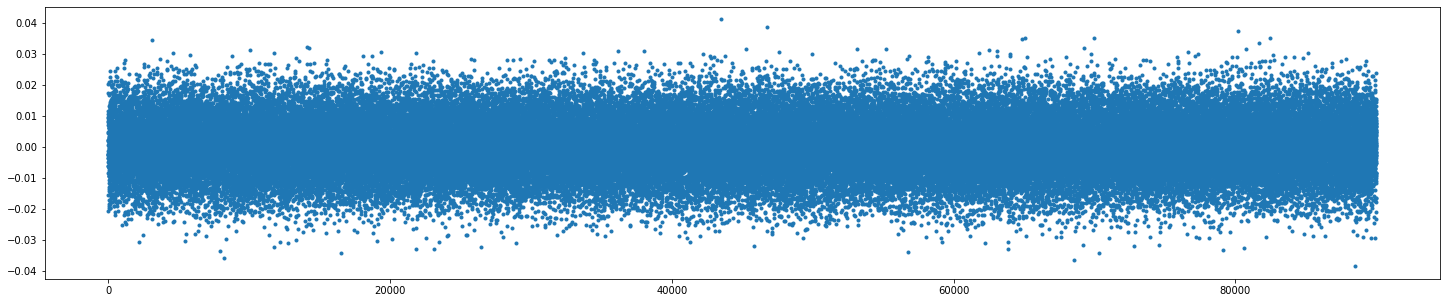

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [2/20], loss_g: 0.6859, loss_d: 0.7005, real_score: 1.0000, fake_score: 0.5036
ye 0
tensor([0.0036, 0.0187], grad_fn=<SliceBackward0>)


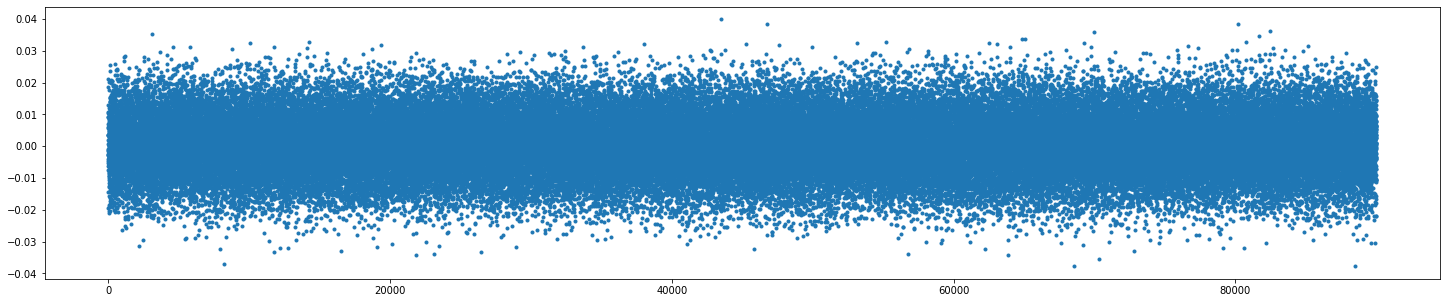

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [3/20], loss_g: 0.6820, loss_d: 0.7046, real_score: 1.0000, fake_score: 0.5057
ye 0
tensor([0.0049, 0.0199], grad_fn=<SliceBackward0>)


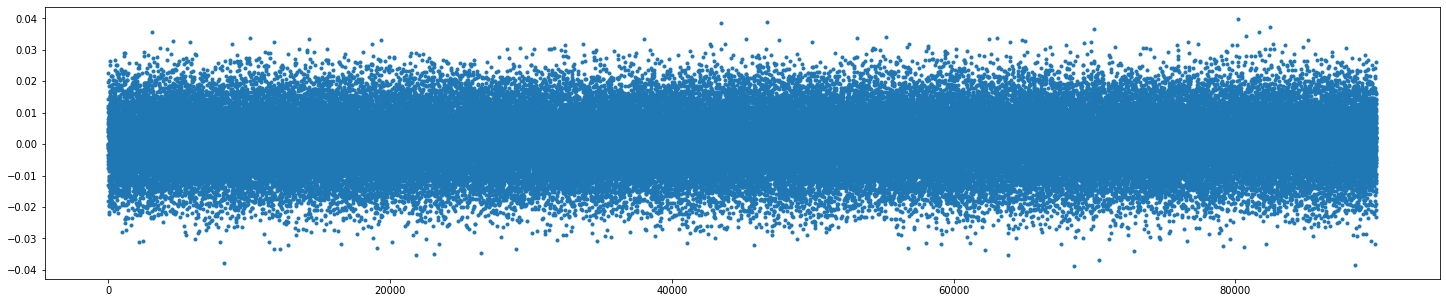

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [4/20], loss_g: 0.6781, loss_d: 0.7086, real_score: 1.0000, fake_score: 0.5077
ye 0
tensor([0.0060, 0.0207], grad_fn=<SliceBackward0>)


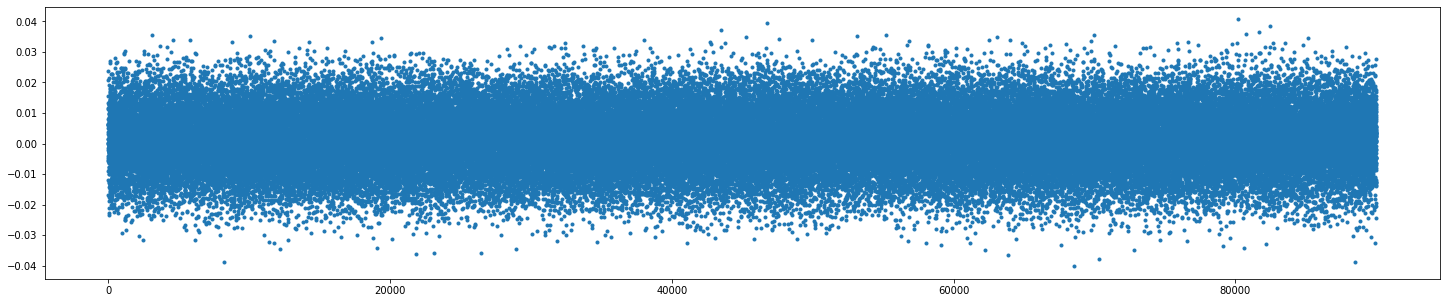

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [5/20], loss_g: 0.6743, loss_d: 0.7128, real_score: 1.0000, fake_score: 0.5097
ye 0
tensor([0.0072, 0.0211], grad_fn=<SliceBackward0>)


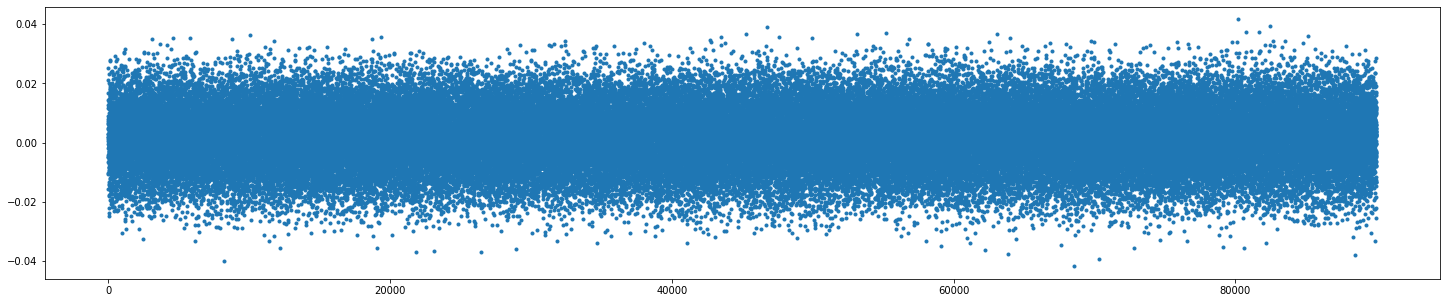

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [6/20], loss_g: 0.6703, loss_d: 0.7170, real_score: 1.0000, fake_score: 0.5118
ye 0
tensor([0.0082, 0.0211], grad_fn=<SliceBackward0>)


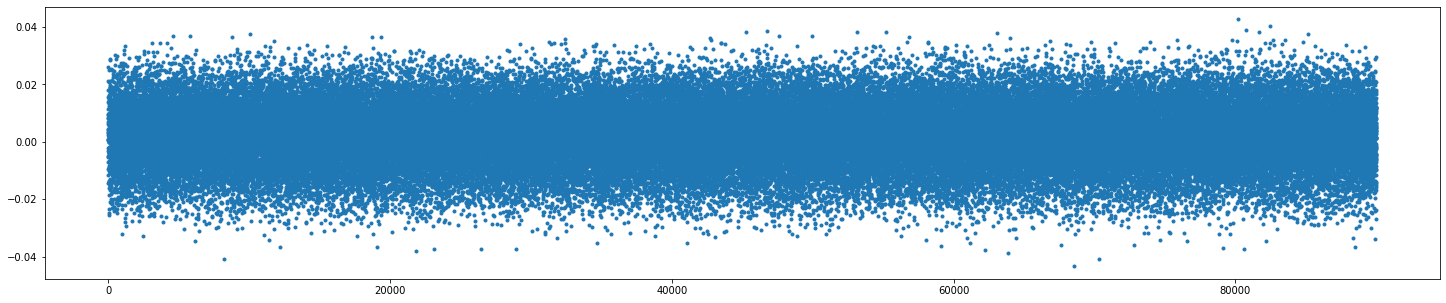

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [7/20], loss_g: 0.6665, loss_d: 0.7214, real_score: 1.0000, fake_score: 0.5139
ye 0
tensor([0.0089, 0.0186], grad_fn=<SliceBackward0>)


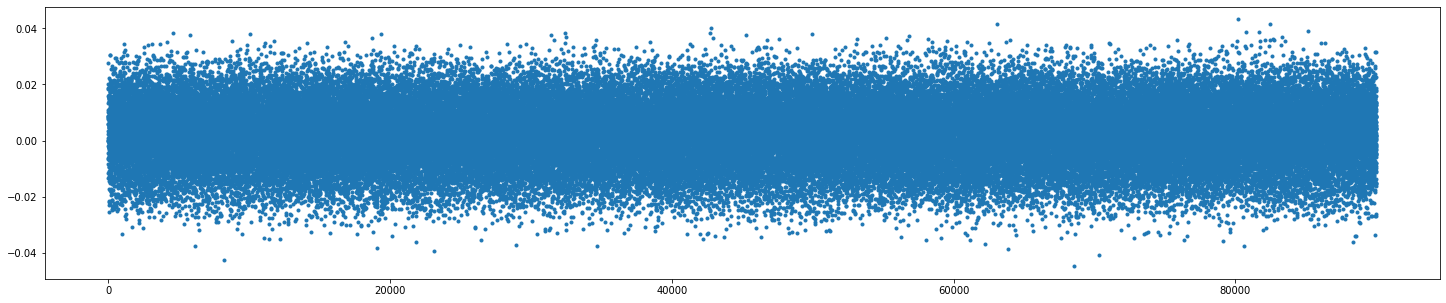

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [8/20], loss_g: 0.6626, loss_d: 0.7253, real_score: 1.0000, fake_score: 0.5158
ye 0
tensor([0.0098, 0.0176], grad_fn=<SliceBackward0>)


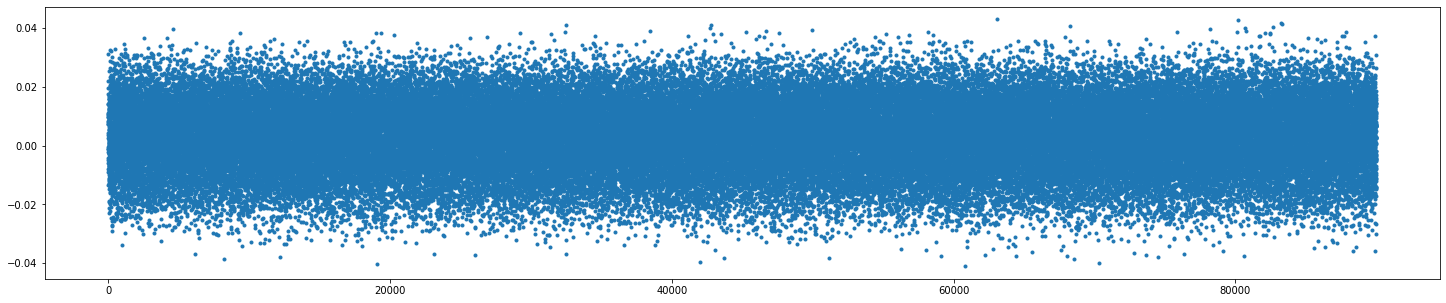

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [9/20], loss_g: 0.6590, loss_d: 0.7297, real_score: 1.0000, fake_score: 0.5179
ye 0
tensor([0.0098, 0.0189], grad_fn=<SliceBackward0>)


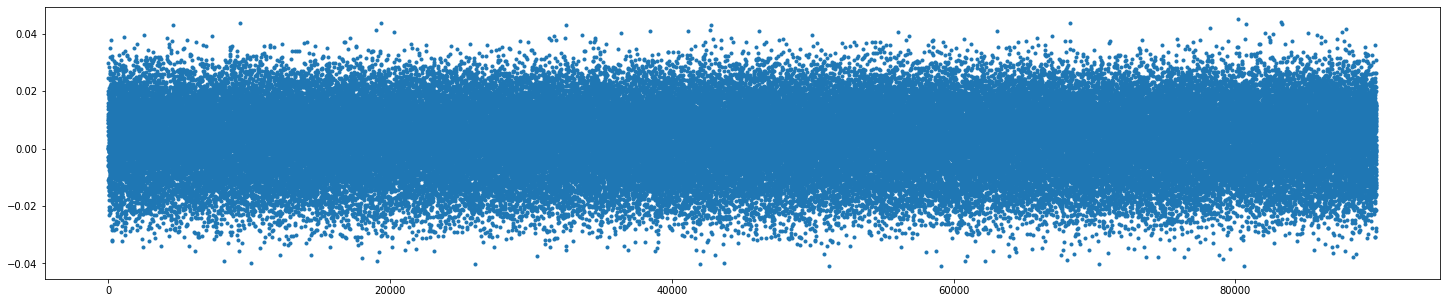

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [10/20], loss_g: 0.6555, loss_d: 0.7335, real_score: 1.0000, fake_score: 0.5198
ye 0
tensor([0.0135, 0.0187], grad_fn=<SliceBackward0>)


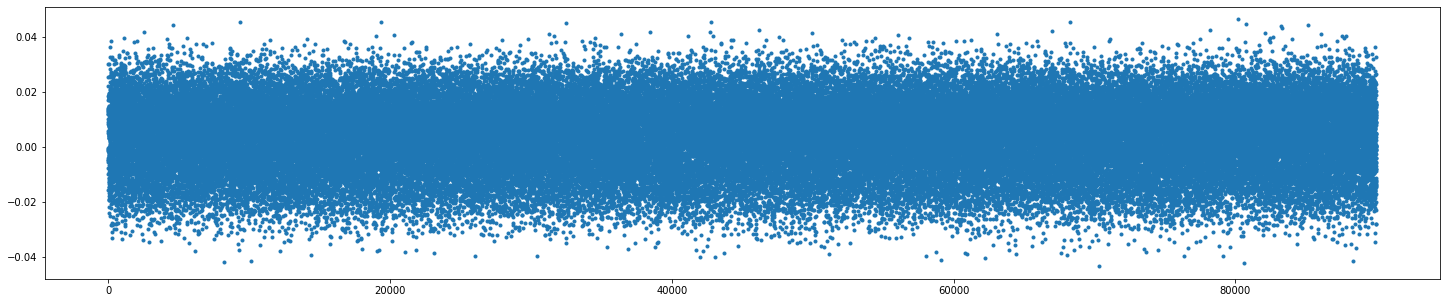

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [11/20], loss_g: 0.6524, loss_d: 0.7371, real_score: 1.0000, fake_score: 0.5215
ye 0
tensor([0.0152, 0.0177], grad_fn=<SliceBackward0>)


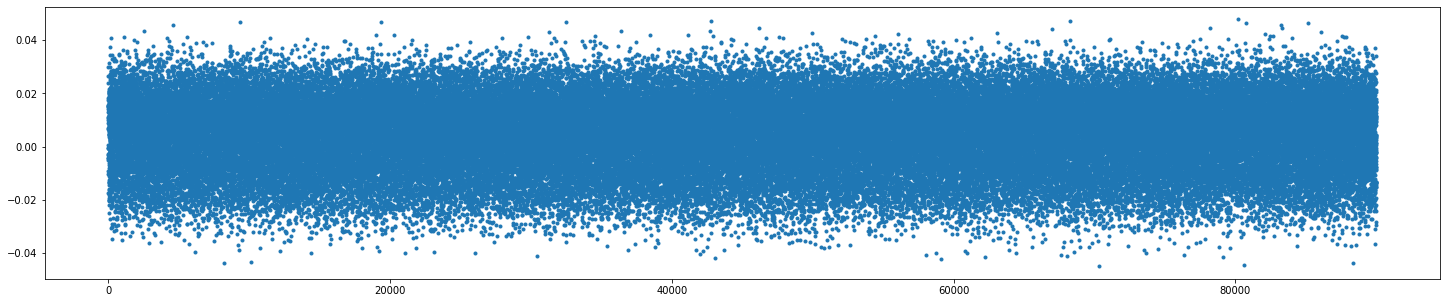

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [12/20], loss_g: 0.6495, loss_d: 0.7407, real_score: 1.0000, fake_score: 0.5232
ye 0
tensor([0.0167, 0.0173], grad_fn=<SliceBackward0>)


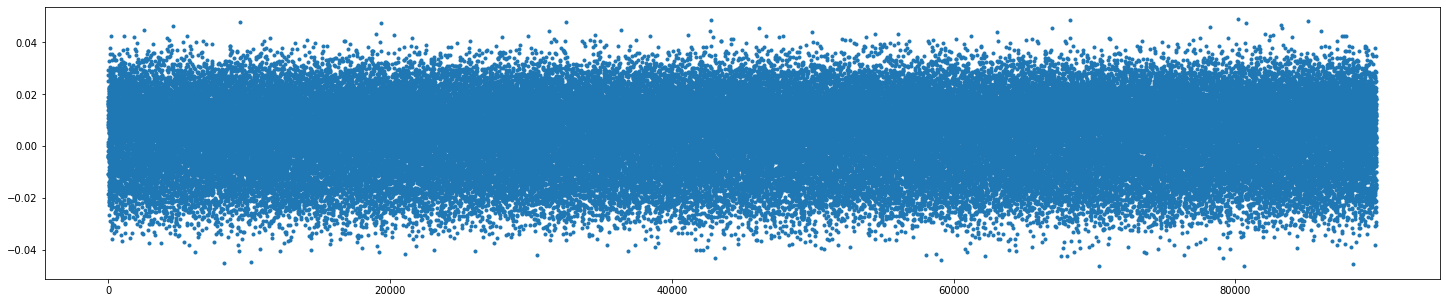

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [13/20], loss_g: 0.6470, loss_d: 0.7436, real_score: 1.0000, fake_score: 0.5246
ye 0
tensor([0.0178, 0.0171], grad_fn=<SliceBackward0>)


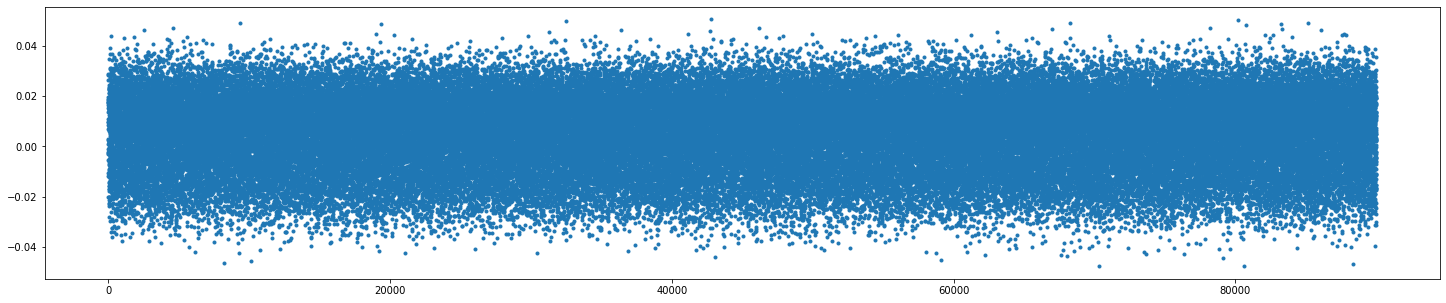

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [14/20], loss_g: 0.6449, loss_d: 0.7464, real_score: 1.0000, fake_score: 0.5259
ye 0
tensor([0.0182, 0.0179], grad_fn=<SliceBackward0>)


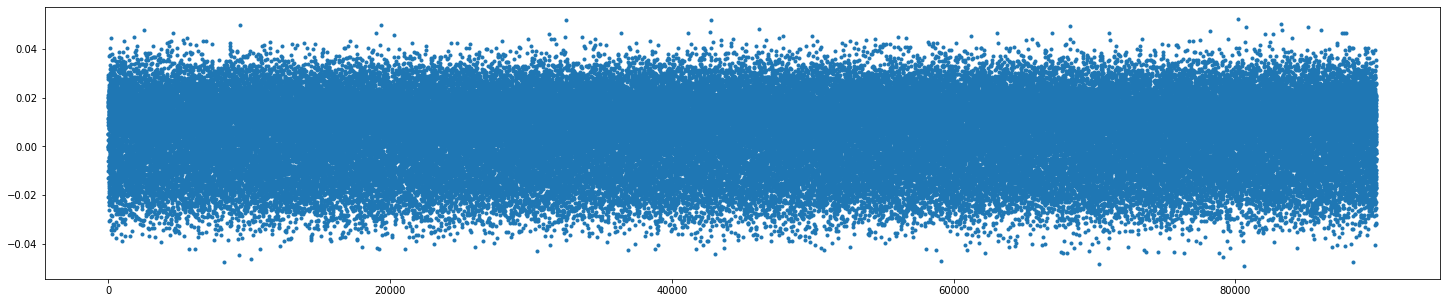

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [15/20], loss_g: 0.6433, loss_d: 0.7481, real_score: 1.0000, fake_score: 0.5267
ye 0
tensor([0.0182, 0.0163], grad_fn=<SliceBackward0>)


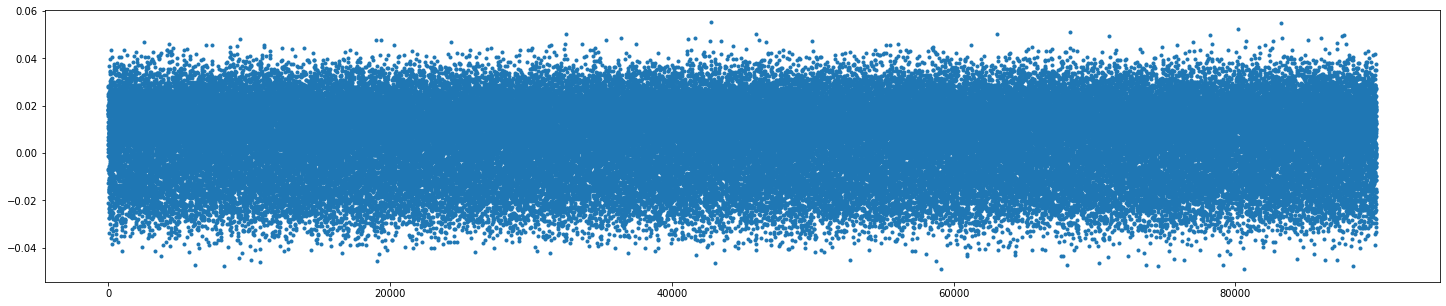

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [16/20], loss_g: 0.6418, loss_d: 0.7503, real_score: 1.0000, fake_score: 0.5278
ye 0
tensor([0.0192, 0.0147], grad_fn=<SliceBackward0>)


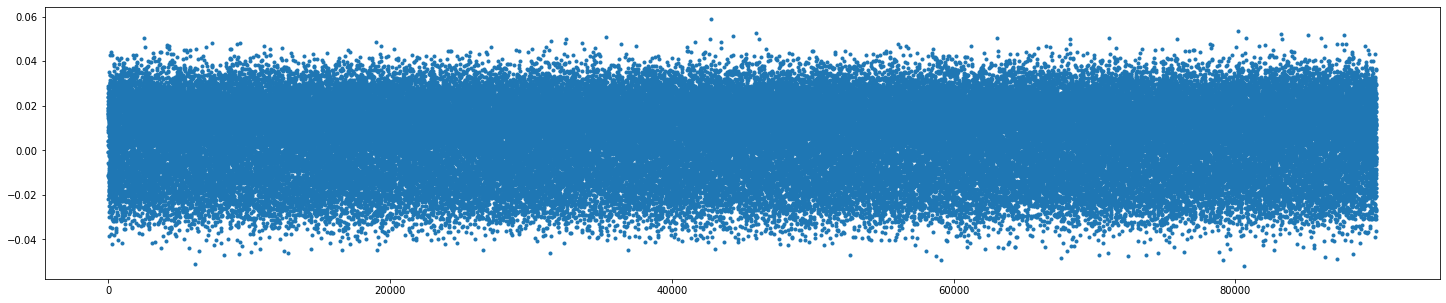

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [17/20], loss_g: 0.6407, loss_d: 0.7517, real_score: 1.0000, fake_score: 0.5284
ye 0
tensor([0.0205, 0.0138], grad_fn=<SliceBackward0>)


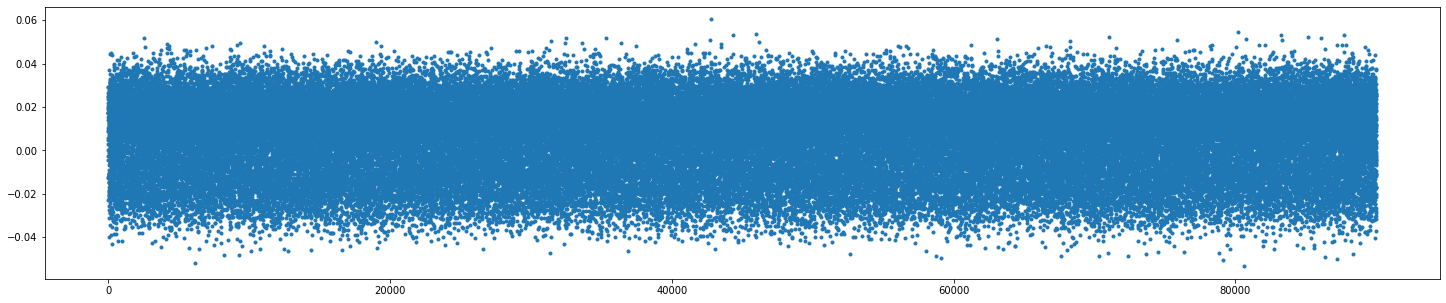

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [18/20], loss_g: 0.6402, loss_d: 0.7524, real_score: 1.0000, fake_score: 0.5288
ye 0
tensor([0.0197, 0.0153], grad_fn=<SliceBackward0>)


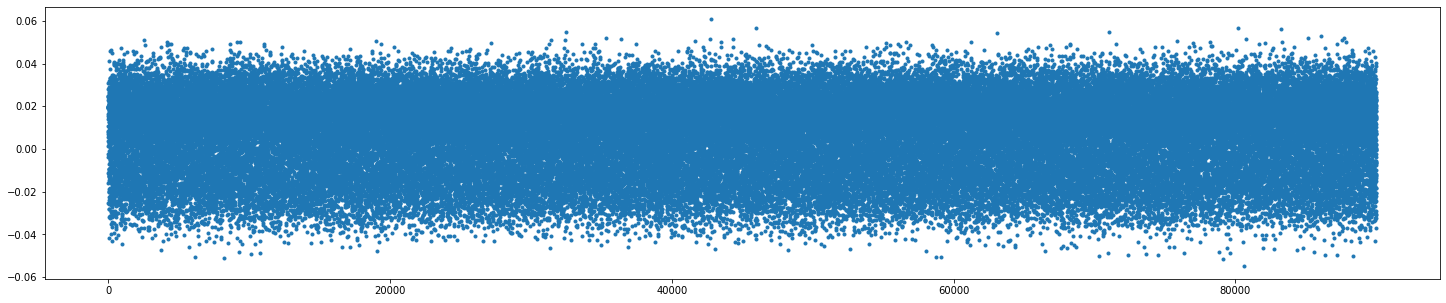

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [19/20], loss_g: 0.6401, loss_d: 0.7529, real_score: 1.0000, fake_score: 0.5290
ye 0
tensor([0.0210, 0.0141], grad_fn=<SliceBackward0>)


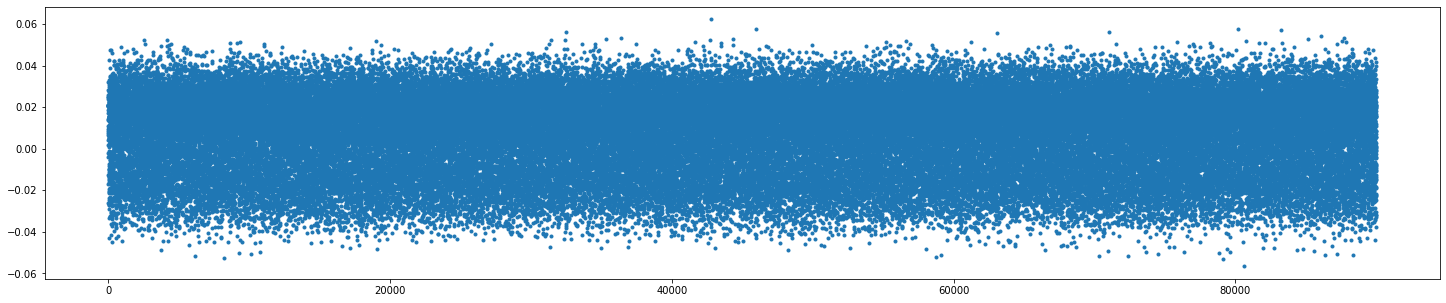

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [20/20], loss_g: 0.6404, loss_d: 0.7531, real_score: 1.0000, fake_score: 0.5291
ye 0
tensor([0.0223, 0.0131], grad_fn=<SliceBackward0>)


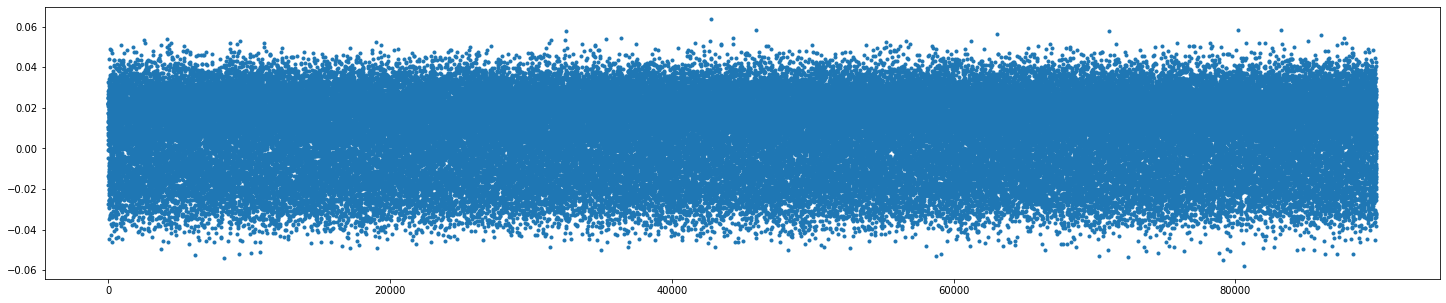

In [144]:
history = fit(epochs, lr)

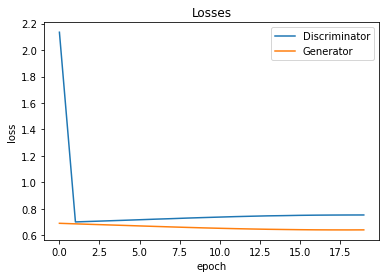

In [145]:
losses_g, losses_d, real_scores, fake_scores = history
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

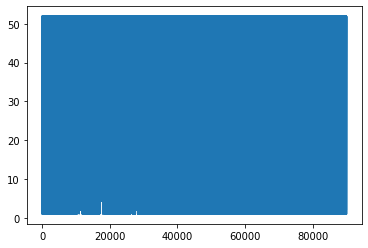

In [146]:
plt.plot(input_data)

ye 0
tensor([0.0223, 0.0131], grad_fn=<SliceBackward0>)


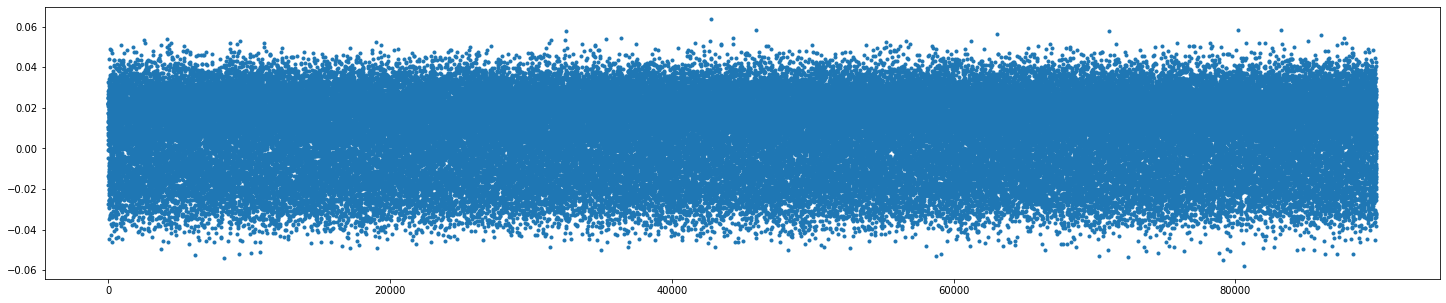

In [147]:
latent_size=256
# fixed_latent = torch.randn(batch_size, latent_size, 1, device=device)
show_gen_samples(fixed_latent[:1]) 
